In [59]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [182]:
#Import all the necessary modules
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#To get Confision Metric
from sklearn import metrics
#Train Test Data
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [183]:
#df =  pd.read_csv('C:\\Users\\anshumans\\Downloads\\Iris_external.csv')
df =  pd.read_csv('C:\\Users\\anshumans\\Downloads\\iris.csv')

df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [184]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [185]:
df = df.fillna(df.median())
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [186]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['Species'] = df['Species'].replace({'Iris-setosa' : 0, 'Iris-versicolor' : 1 , 'Iris-virginica': 2})

In [187]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [188]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [189]:
df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

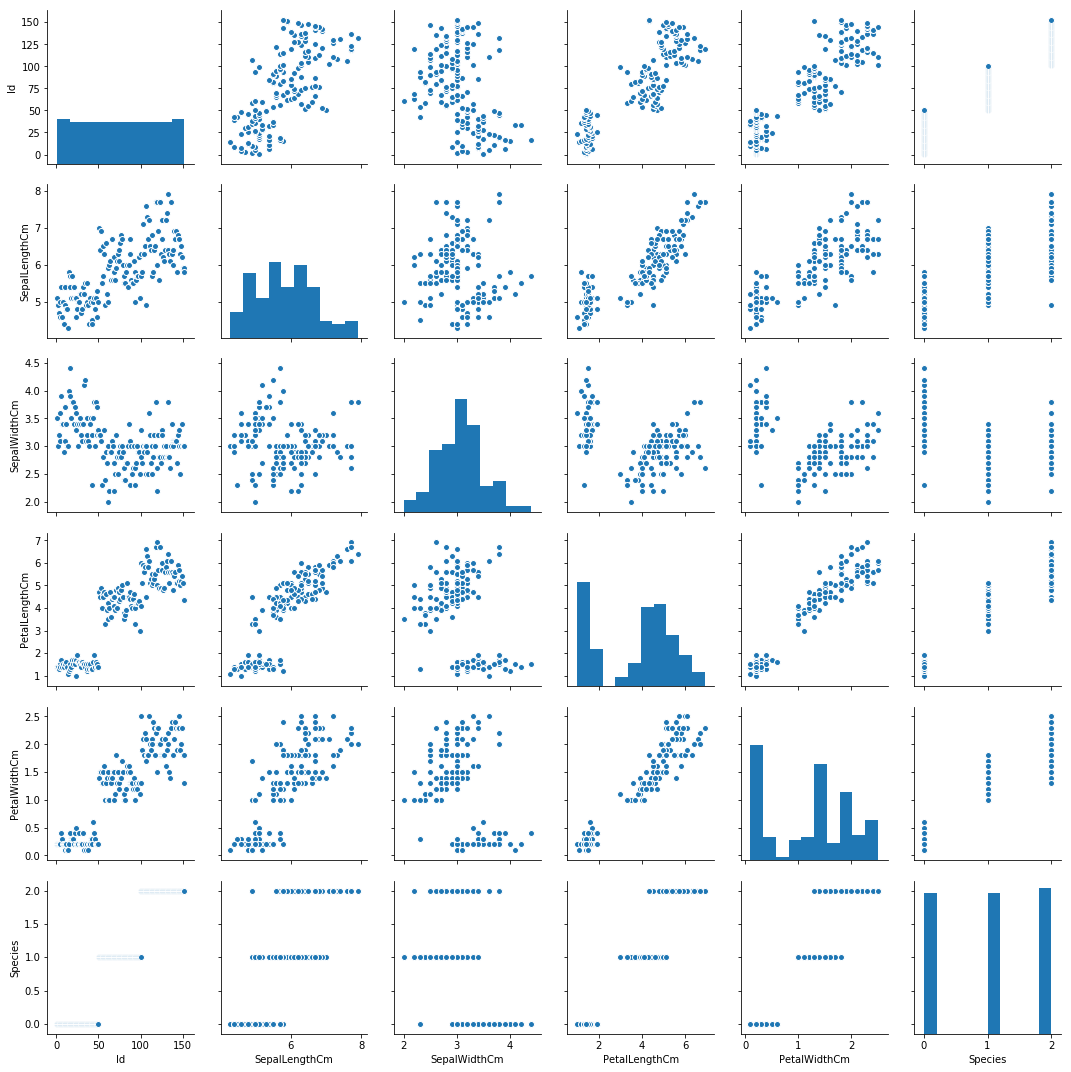

In [190]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA7FFE9278>,
      dtype=object)

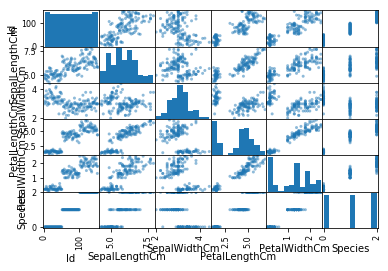

In [191]:
pd.plotting.scatter_matrix(df, alpha=0.5)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [192]:
# Copy all the predictor variables into X dataframe. Since 'Class' is dependent variable drop it
X = df.drop('Species', axis=1)

# Copy the 'Class' column alone into the y dataframe. This is the dependent variable
y = df['Species']

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [193]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [194]:
print(X_train)
print(X_test)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
19    20            5.1           3.8           1.50           0.3
113  114            5.7           2.5           5.00           2.0
103  104            6.3           2.9           5.60           1.8
77    78            6.7           3.0           5.00           1.7
145  146            6.7           3.0           5.20           2.3
58    59            6.6           2.9           4.60           1.3
121  122            5.6           2.8           4.90           2.0
56    57            6.3           3.3           4.70           1.6
28    29            5.2           3.4           1.40           0.2
51    52            6.4           3.2           4.50           1.5
109  110            7.2           3.6           6.10           2.5
66    67            5.6           3.0           4.50           1.5
17    18            5.1           3.5           1.40           0.3
119  120            6.0           2.2           5.00          

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [195]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [196]:
predicted_labels = NNH.predict(X_test)

In [197]:
predicted_labels

array([1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 1, 2, 0], dtype=int64)

In [198]:
NNH.score(X_test,y_test)

1.0

In [199]:
accuracy_score(y_test, predicted_labels)

1.0

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
predicted_labels
NNH.score(X_test,y_test)
accuracy_score(y_test, predicted_labels)

1.0

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
predicted_labels
NNH.score(X_test,y_test)
accuracy_score(y_test, predicted_labels)

0.967741935483871

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [202]:
for i in range(0,20):
    print("k:",i)
    NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    predicted_labels
    print("Score :",NNH.score(X_test,y_test))
    print("Accuracy:",accuracy_score(y_test, predicted_labels))
    print("MSE:",1-accuracy_score(y_test, predicted_labels))

k: 0
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 1
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 2
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 3
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 4
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 5
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 6
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 7
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 8
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 9
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 10
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE: 0.032258064516129004
k: 11
Score : 0.967741935483871
Accuracy: 0.967741935483871
MSE:

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# Naive Bayes with Iris Data

In [226]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [250]:
df =  pd.read_csv('C:\\Users\\anshumans\\Downloads\\iris.csv')

df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [251]:
df = df.fillna(df.median())
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


In [252]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['Species'] = df['Species'].replace({'Iris-setosa' : 0, 'Iris-versicolor' : 1 , 'Iris-virginica': 2})

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [253]:
#Check the dataset
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

array = df.values
X = array[:,1:4] # select all rows and 1:4 columns which are the attributes
Y = array[:,4]   # select all rows and the 5th column which is the classification 0,1,2
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int64
[[5.1  3.5  1.4 ]
 [4.9  3.   1.4 ]
 [4.7  3.2  1.3 ]
 [4.6  3.1  1.5 ]
 [5.   3.6  1.4 ]
 [5.4  3.9  1.7 ]
 [4.6  3.4  1.4 ]
 [5.   3.4  1.5 ]
 [4.4  2.9  1.4 ]
 [4.9  3.1  1.5 ]
 [5.4  3.7  1.5 ]
 [4.8  3.4  1.6 ]
 [4.8  3.   1.4 ]
 [4.3  3.   1.1 ]
 [5.8  4.   1.2 ]
 [5.7  4.4  1.5 ]
 [5.4  3.9  1.3 ]
 [5.1  3.5  1.4 ]
 [5.7  3.8  1.7 ]
 [5.1  3.8  1.5 ]
 [5.4  3.4  1.7 ]
 [5.1  3.7  1.5 ]
 [4.6  3.6  1.

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

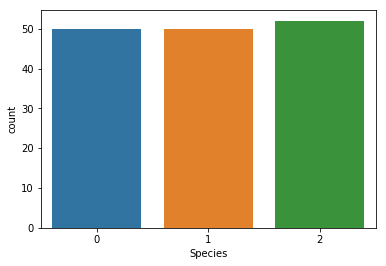

In [254]:
sns.countplot(x='Species', data=df)

Species
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SepalLengthCm, dtype: object

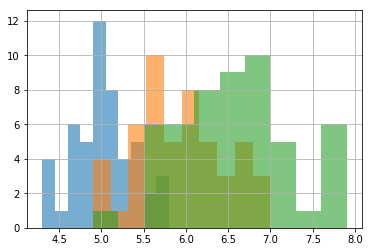

In [255]:
df.groupby('Species').SepalLengthCm.hist(alpha=0.6)

Species
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SepalWidthCm, dtype: object

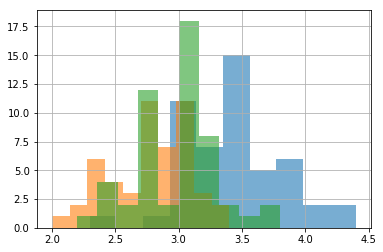

In [256]:
df.groupby('Species').SepalWidthCm.hist(alpha=0.6)

Species
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PetalLengthCm, dtype: object

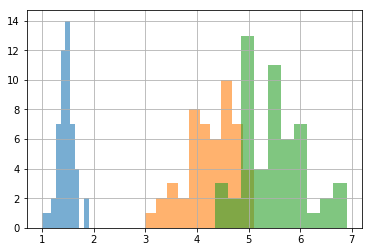

In [257]:
df.groupby('Species').PetalLengthCm.hist(alpha=0.6)

Species
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PetalWidthCm, dtype: object

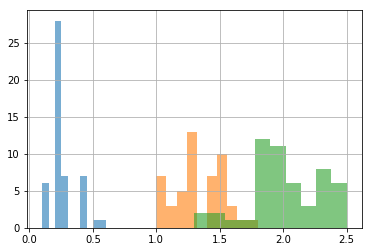

In [258]:
df.groupby('Species').PetalWidthCm.hist(alpha=0.6)

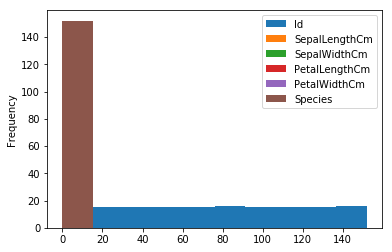

In [259]:
df.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA02E647B8>]],
      dtype=object)

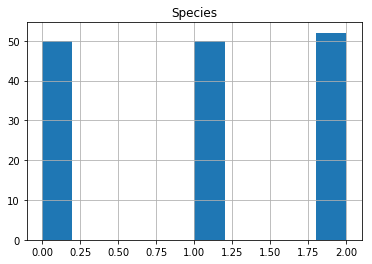

In [260]:
df.hist(column='Species')

In [261]:
#Drop Id variable from data
df = df.drop('Id', axis=1)

In [262]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


### Question 12 
Find Correlation among all variables and give your insights 

In [263]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [264]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


### Split data in Training and test set in 80:20.

In [265]:
# Copy all the predictor variables into X dataframe. Since 'Class' is dependent variable drop it
X = df.drop('Species', axis=1)

# Copy the 'Class' column alone into the y dataframe. This is the dependent variable
y = df['Species']

# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


### Question 13 
Do Feature Scaling 

In [266]:
# Use StandardScaler or similar methods

In [267]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
df_scaled = preprocessing.scale(df)

In [268]:
df_scaled

array([[-0.90675025,  1.04046305, -1.35363195, -1.32500785, -1.23695777],
       [-1.15069013, -0.12412004, -1.35363195, -1.32500785, -1.23695777],
       [-1.39463002,  0.3417132 , -1.41083297, -1.32500785, -1.23695777],
       [-1.51659997,  0.10879658, -1.29643094, -1.32500785, -1.23695777],
       [-1.02872019,  1.27337967, -1.35363195, -1.32500785, -1.23695777],
       [-0.54084041,  1.97212952, -1.1820289 , -1.06087514, -1.23695777],
       [-1.51659997,  0.80754643, -1.35363195, -1.1929415 , -1.23695777],
       [-1.02872019,  0.80754643, -1.29643094, -1.32500785, -1.23695777],
       [-1.76053986, -0.35703666, -1.35363195, -1.32500785, -1.23695777],
       [-1.15069013,  0.10879658, -1.29643094, -1.45707421, -1.23695777],
       [-0.54084041,  1.50629629, -1.29643094, -1.32500785, -1.23695777],
       [-1.27266008,  0.80754643, -1.23922992, -1.32500785, -1.23695777],
       [-1.27266008, -0.12412004, -1.35363195, -1.45707421, -1.23695777],
       [-1.8825098 , -0.12412004, -1.5

In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)

array([[-0.90675025,  1.04046305, -1.35363195, -1.32500785, -1.23695777],
       [-1.15069013, -0.12412004, -1.35363195, -1.32500785, -1.23695777],
       [-1.39463002,  0.3417132 , -1.41083297, -1.32500785, -1.23695777],
       [-1.51659997,  0.10879658, -1.29643094, -1.32500785, -1.23695777],
       [-1.02872019,  1.27337967, -1.35363195, -1.32500785, -1.23695777],
       [-0.54084041,  1.97212952, -1.1820289 , -1.06087514, -1.23695777],
       [-1.51659997,  0.80754643, -1.35363195, -1.1929415 , -1.23695777],
       [-1.02872019,  0.80754643, -1.29643094, -1.32500785, -1.23695777],
       [-1.76053986, -0.35703666, -1.35363195, -1.32500785, -1.23695777],
       [-1.15069013,  0.10879658, -1.29643094, -1.45707421, -1.23695777],
       [-0.54084041,  1.50629629, -1.29643094, -1.32500785, -1.23695777],
       [-1.27266008,  0.80754643, -1.23922992, -1.32500785, -1.23695777],
       [-1.27266008, -0.12412004, -1.35363195, -1.45707421, -1.23695777],
       [-1.8825098 , -0.12412004, -1.5

In [270]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,4.7,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


### Question 14 
Train and Fit NaiveBayes Model

In [271]:
#Fit the model
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [272]:
#Predict
# make predictions
expected = y_test
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [275]:
# show Confusion Matrix
# summarize the fit of the model
print(metrics.confusion_matrix(expected, predicted))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [276]:
# show accuracy
model.score(X_test , y_test)

1.0

In [274]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        31



In [277]:
accuracy_score(y_test, predicted)

1.0

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779